In [15]:
import pandas as pd
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, GlobalMaxPooling1D
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [6]:
data_source = pd.read_csv('traff.csv', names=['Date', 'Value'])
values = np.array([float(u.replace(',', '')) for u in data_source['Value'].to_numpy()]).reshape(-1, 1)
scaler = StandardScaler()
scaled_values = scaler.fit_transform(values)

train, test = train_test_split(scaled_values, test_size=0.2, shuffle=False)

In [16]:
model = keras.Sequential([
    LSTM(32, input_shape=(3, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    Flatten(),
    Dropout(0.2),
    Dense(64, activation='linear'),
    Dense(32, activation='linear'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse')

generator = TimeseriesGenerator(train, train, length=3, sampling_rate=1, batch_size=10)
validation_generator = TimeseriesGenerator(test, test, length=3, sampling_rate=1, batch_size=10)
model.fit(generator, epochs=70, validation_data=validation_generator, verbose=1)

Epoch 1/70
88/88 [==============================] - 12s 40ms/step - loss: 0.3629 - val_loss: 0.2956
Epoch 2/70
88/88 [==============================] - 2s 17ms/step - loss: 0.2088 - val_loss: 0.2963
Epoch 3/70
88/88 [==============================] - 2s 23ms/step - loss: 0.1924 - val_loss: 0.3017
Epoch 4/70
88/88 [==============================] - 2s 19ms/step - loss: 0.1863 - val_loss: 0.2584
Epoch 5/70
88/88 [==============================] - 1s 15ms/step - loss: 0.1695 - val_loss: 0.2128
Epoch 6/70
88/88 [==============================] - 1s 15ms/step - loss: 0.1604 - val_loss: 0.2100
Epoch 7/70
88/88 [==============================] - 2s 19ms/step - loss: 0.1559 - val_loss: 0.1752
Epoch 8/70
88/88 [==============================] - 2s 21ms/step - loss: 0.1322 - val_loss: 0.1900
Epoch 9/70
88/88 [==============================] - 2s 17ms/step - loss: 0.1226 - val_loss: 0.1480
Epoch 10/70
88/88 [==============================] - 2s 18ms/step - loss: 0.1145 - val_loss: 0.1195
Epoch 11

22/22 [==============================] - 2s 5ms/step


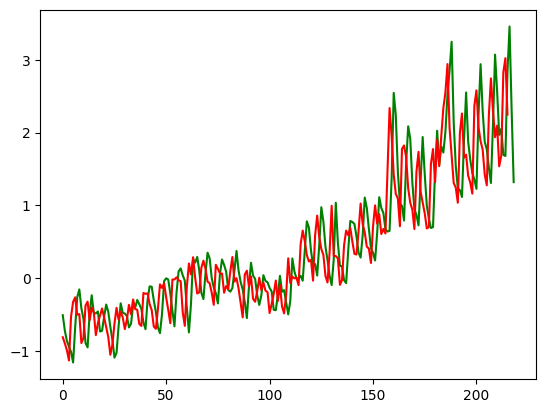

In [17]:
plt.plot(test, label='Исходеый', color='green')
plt.plot(model.predict(validation_generator, verbose=True), label='Предсказанный', color='red')
plt.show()